Домашнее задание к лекции "Визуализация данных"
Обязательная часть
Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

построить не менее 4 визуализаций различных видов;
каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).
Откуда брать данные?

Можете взять свои рабочие данные, либо найти открытые данные (например, на kaggle.com) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:

данные приложений из Google Play;
данные о видео из трендов YouTube;
данные об уровне счастья в разных странах;
данные по фильмам и сериалам Netflix.

In [1]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,7


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
df = pd.read_csv('2019.csv')
#df.head()

df_top = df[['Country or region', 'Score']].head(10)  
df_top

,Country or region,Score
0,Finland,7.769
1,Denmark,7.600
2,Norway,7.554
3,Iceland,7.494
4,Netherlands,7.488
5,Switzerland,7.480
6,Sweden,7.343
7,New Zealand,7.307
8,Canada,7.278
9,Austria,7.246


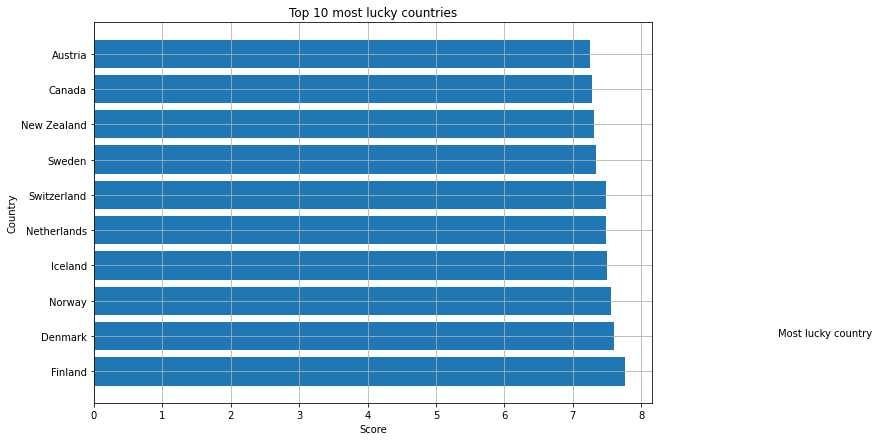

In [34]:
plt.barh(df_top['Country or region'], df_top['Score'])
plt.xlabel('Score')
plt.ylabel('Country')
plt.title('Top 10 most lucky countries')
plt.text(10, 1, 'Most lucky country')
plt.grid()

На графике отображены ТОП 10 стран с самым высоким уровнем "счастья". Финляндия занимает первое место в рейтинге.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [16]:
net = pd.read_csv('netflix.csv')
net.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


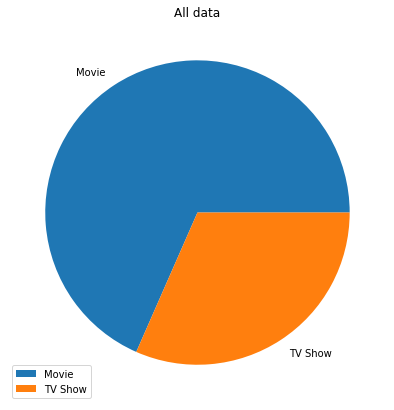

In [17]:
v = net['type'].value_counts()
# соотношение фильмов и сериалов
v.plot(kind='pie')
plt.xlabel('')
plt.ylabel('')
plt.title('All data')
plt.legend()

На графике можно увидеть, что фильмы, на данный момент, занимают большую часть архива сервиса

In [18]:
movie = net[(net['release_year']>=2000) & (net['release_year']<2020) & (net['type']=='Movie')]
tv_show = net[(net['release_year']>=2000) & (net['release_year']<2020) & (net['type']=='TV Show')]
movie_count = movie.groupby('release_year')[['type']].count()
tv_show_count = tv_show.groupby('release_year')[['type']].count()

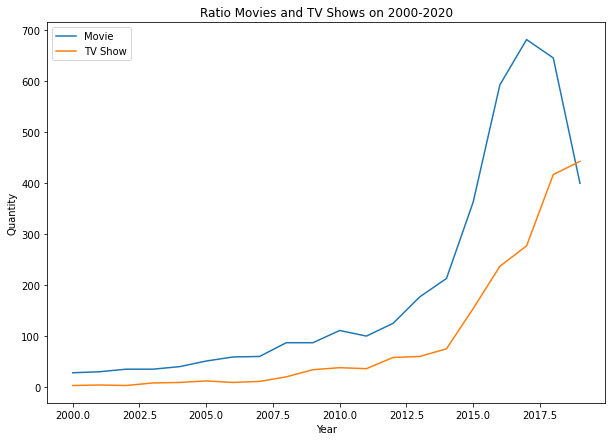

In [19]:
plt.plot(movie_count.index, movie_count['type'], label='Movie')
plt.plot(tv_show_count.index, tv_show_count['type'], label='TV Show')
plt.xlabel('Year')
plt.ylabel('Quantity')
plt.title('Ratio Movies and TV Shows on 2000-2020')
plt.legend()

На данном графике можно увидеть что за последние 20 лет выпускалось все больше фильмов и сериалов, однако в 2016 году выпуск фильмов пошел на спад. При этом фиьмов до 2017 года выпускалось больше, чем сериалов.

In [20]:
shows = net[net.duration.str.contains('season', case=False)]['duration'].value_counts()
shows

1 Season      1321
2 Seasons      304
3 Seasons      158
4 Seasons       61
5 Seasons       46
6 Seasons       22
7 Seasons       21
8 Seasons       16
9 Seasons        7
11 Seasons       3
10 Seasons       3
12 Seasons       2
13 Seasons       2
15 Seasons       2
14 Seasons       1
Name: duration, dtype: int64

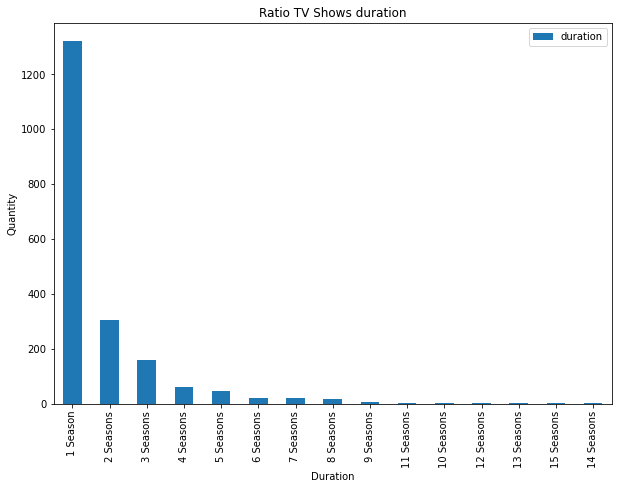

In [29]:
shows.plot(kind='bar')
plt.xlabel('Duration')
plt.ylabel('Quantity')
plt.title('Ratio TV Shows duration')
plt.legend()


На графике видно, что больше всего сериалов с 1 сезоном. Так же видно, что с увеличением количества сезонов в сериалах их количество уменьшается. Уменьшение идет с геометрической прогрессией.

In [13]:
duration_df = (
  net[net.duration.str.contains('min', case=False)]
 .groupby('duration')
 .count()
 .sort_values(by='type', ascending=False)
 .reset_index()
 .iloc[:,:2] 
)
duration_df.columns = ['Duration', 'Number of movies']

duration_df.style.bar()

,Duration,Number of movies
0,90 min,111
1,91 min,104
2,92 min,101
3,95 min,94
4,94 min,94
5,93 min,90
6,99 min,88
7,97 min,88
8,88 min,86
9,96 min,85


На графике видно, что самая популярная продолжительность фильмов лежит в пределах 90-99 минут.